### Tutorial: Marginalized Likelihood optimization for model selection
In this tutorial we are exploring how to use in-build marginalized likelihood optimizer. 
The optimizer can optimize nearly any parameters via general function as well as includes couple of
quick common usecase references. 

In [1]:
import torch
from stpy.continuous_processes.gauss_procc import GaussianProcess
from stpy.kernels import KernelFunction
from stpy.helpers.helper import interval

In [2]:
n = 30
d = 2
x = torch.rand(n,d).double()*2 - 1
xtest = torch.from_numpy(interval(50,d,L_infinity_ball=1))

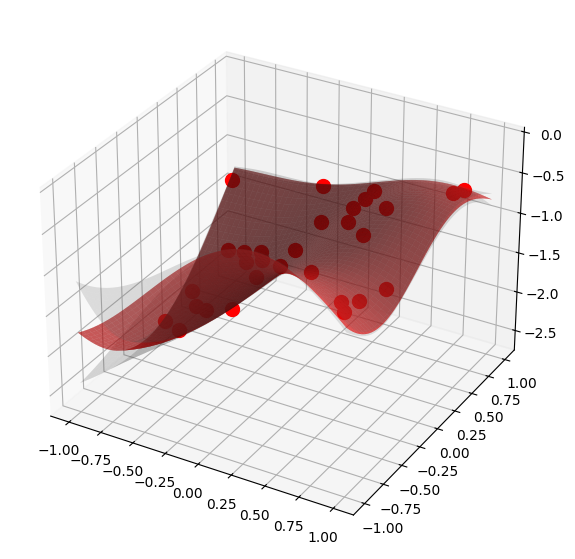

In [14]:
GP = GaussianProcess(gamma=1121, kernel_name="ard", d=d)
y = GP.sample(x)
GP.fit_gp(x,y)
GP.visualize(xtest)

Optimization terminated successfully.
         Current function value: 0.184047
         Iterations: 6
         Function evaluations: 7
Optimization terminated successfully.
         Current function value: 0.184047
         Iterations: 5
         Function evaluations: 6
Kernel description:

	kernel: ard
	operation: -
	kappa=1
	group=[0]
	offset=0.0
	ard_gamma=tensor([0.6111], dtype=torch.float64)
lambda=0.001


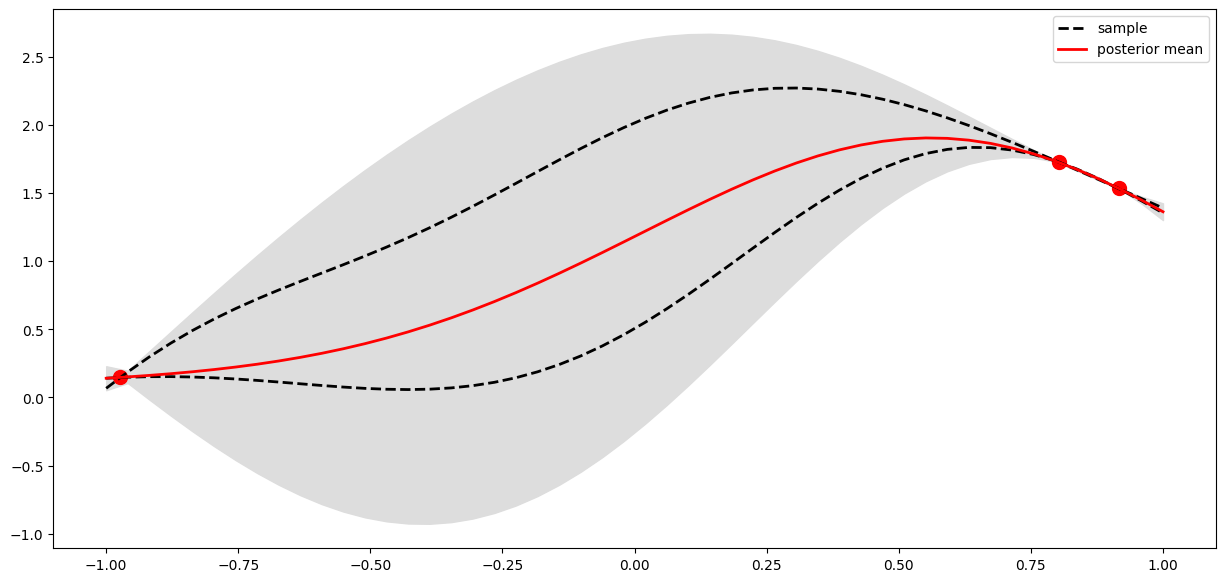

In [39]:
## Kernels can be defined as via kernel object
# 2 dimensional additive kernel with groups [0] and [1]
k = KernelFunction(kernel_name = "ard", d = d)
GP = GaussianProcess(kernel=k)
y = GP.sample(x)
GP.fit_gp(x,y)
GP.optimize_params(type="bandwidth", restarts=2, verbose = False, optimizer="pytorch-minimize")

GP.visualize(xtest)

In [37]:
# ## Additive via algebra
k1 = KernelFunction(kernel_name="ard" ,ard_gamma = 0.1, d = 1, group=[0])
k2 = KernelFunction(kernel_name="polynomial" ,ard_gamma = 0.5, power = 2, d = 1, group=[1])
k = k1 + k2

GP = GaussianProcess(kernel=k, d=2)
x = torch.rand(n, d).double() * 2 - 1
GP.fit_gp(x, y)
GP.optimize_params(type="bandwidth", restarts=2, optimizer="pytorch-minimize")

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
## Optimize additive groups
k = KernelFunction(kernel_name="ard", d=2, groups = [[0,1]])
GP = GaussianProcess(kernel=k, d=2)
#
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
GP.optimize_params(type="groups", restarts=2)


UnboundLocalError: local variable 'cost' referenced before assignment

In [ ]:
k = KernelFunction(kernel_name="polynomial", d=2, power = 3)
GP = GaussianProcess(kernel=k, d=2)
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
params = {"0":{"power":(1.,[1,2,3,4,5],None)}}
GP.optimize_params_general(params = params, optimizer="discrete")



: 

In [ ]:
## Full covariance optimization on PSD manifold
k = KernelFunction(kernel_name="full_covariance_se", d=2)
GP = GaussianProcess(kernel=k, d=2)
x = torch.rand(n, d).double() * 2 - 1
y = GP.sample(x)
GP.fit_gp(x, y)
GP.optimize_params(type="covariance", restarts=2)

: 

In [ ]:
# the same optimization problem can be run with regularizer as well 
GP.optimize_params(type="covariance", restarts=2, regularizer=["spectral_norm",0.1])



: 

: 